In [47]:
from torch import empty
import math
from NN_Modules import LossMSE, ReLU, Tanh, Sigmoid, FCC, Sequential, modelTester, modelTrainer, accuracy_count

In [35]:
def in_circle(dataset):
    dataset = dataset.add(-0.5) #Center the points
    target = empty(dataset.shape[0], 2)
    target[:,0] = dataset.pow(2).sum(1) <= 1 / (2 * math.pi)
    target[:,1] =  (target[:,0] != 1)
    return target

train_size = 1000
test_size = 1000
train_input = empty(train_size, 2).uniform_(0,1)
train_target = in_circle(train_input)

test_input = empty(test_size, 2).uniform_(0,1)
test_target = in_circle(test_input)


model = Sequential(["FCC","Tanh", "FCC","ReLU","FCC","Tanh", "FCC"],[[2,25],[], [25,25],[], [25,25],[], [25,2]],"MSE",momentum = 0.1)
trained_model ,loss, train_acc  = modelTrainer(model = model , num_epoch = 300, train_input = train_input,train_target = train_target, train_batch = 200)
test_acc = modelTester(trained_model, test_input,test_target,10)
print("Final Test accuracy: ", test_acc)
print("Final Train accuracy: ", train_acc[0][-1])

Training Loss for epoch 0: 0.4578993320465088
Training Loss for epoch 30: 0.24725136160850525
Training Loss for epoch 60: 0.24509328603744507
Training Loss for epoch 90: 0.2422269582748413
Training Loss for epoch 120: 0.2382185310125351
Training Loss for epoch 150: 0.23237675428390503
Training Loss for epoch 180: 0.22362273931503296
Training Loss for epoch 210: 0.21055664122104645
Training Loss for epoch 240: 0.19209370017051697
Training Loss for epoch 270: 0.16999177634716034
Final Test accuracy:  0.758
Final Train accuracy:  0.772


In [69]:
train_loss_tracks = []
test_acc_tracks = []
num_trials = 100

for i in range(num_trials):
    print('trial:', i)
    seq = Sequential(["FCC","Tanh","FCC","ReLU","FCC","ReLU","FCC"],
                     [[2,25],[],[25,25],[],[25,25],[],[25,2]],"MSE",momentum=0.2)
    _, loss_track, acc_track = modelTrainer(seq, 1000, train_input, train_target, test_input, test_target, 200, 200)
    train_loss_tracks.append(loss_track)
    test_acc_tracks.append(acc_track[0][-1])

trial: 0
Training Loss for epoch 0: 0.38636311888694763
Training Loss for epoch 100: 0.24978119134902954
Training Loss for epoch 200: 0.24790972471237183
Training Loss for epoch 300: 0.24476031959056854
Training Loss for epoch 400: 0.2382459044456482
Training Loss for epoch 500: 0.22211694717407227
Training Loss for epoch 600: 0.1965464949607849
Training Loss for epoch 700: 0.17956143617630005
Training Loss for epoch 800: 0.12465956062078476
Training Loss for epoch 900: 0.07949045300483704
trial: 1
Training Loss for epoch 0: 0.3956175148487091
Training Loss for epoch 100: 0.24458950757980347
Training Loss for epoch 200: 0.2356063425540924
Training Loss for epoch 300: 0.2189747393131256
Training Loss for epoch 400: 0.18554332852363586
Training Loss for epoch 500: 0.11287883669137955
Training Loss for epoch 600: 0.06943308562040329
Training Loss for epoch 700: 0.06057729572057724
Training Loss for epoch 800: 0.05695052072405815
Training Loss for epoch 900: 0.05482012405991554
trial: 2
Tr

Training Loss for epoch 600: 0.07049386948347092
Training Loss for epoch 700: 0.06081355735659599
Training Loss for epoch 800: 0.053531114012002945
Training Loss for epoch 900: 0.04632089287042618
trial: 17
Training Loss for epoch 0: 0.5564521551132202
Training Loss for epoch 100: 0.243240624666214
Training Loss for epoch 200: 0.23329246044158936
Training Loss for epoch 300: 0.2061152309179306
Training Loss for epoch 400: 0.13183285295963287
Training Loss for epoch 500: 0.07870640605688095
Training Loss for epoch 600: 0.06804284453392029
Training Loss for epoch 700: 0.062161579728126526
Training Loss for epoch 800: 0.05583484098315239
Training Loss for epoch 900: 0.05306537076830864
trial: 18
Training Loss for epoch 0: 0.33664336800575256
Training Loss for epoch 100: 0.24392367899417877
Training Loss for epoch 200: 0.2330484837293625
Training Loss for epoch 300: 0.20899486541748047
Training Loss for epoch 400: 0.13945123553276062
Training Loss for epoch 500: 0.08082091063261032
Trainin

Training Loss for epoch 200: 0.22948524355888367
Training Loss for epoch 300: 0.1885923147201538
Training Loss for epoch 400: 0.1054370328783989
Training Loss for epoch 500: 0.0781191810965538
Training Loss for epoch 600: 0.06998911499977112
Training Loss for epoch 700: 0.0637156069278717
Training Loss for epoch 800: 0.05857197195291519
Training Loss for epoch 900: 0.054791733622550964
trial: 34
Training Loss for epoch 0: 0.5052478909492493
Training Loss for epoch 100: 0.24215416610240936
Training Loss for epoch 200: 0.22873641550540924
Training Loss for epoch 300: 0.20274430513381958
Training Loss for epoch 400: 0.12264249473810196
Training Loss for epoch 500: 0.0718875527381897
Training Loss for epoch 600: 0.06304065883159637
Training Loss for epoch 700: 0.05773009732365608
Training Loss for epoch 800: 0.055965784937143326
Training Loss for epoch 900: 0.054568931460380554
trial: 35
Training Loss for epoch 0: 0.5598315596580505
Training Loss for epoch 100: 0.24268747866153717
Training

Training Loss for epoch 800: 0.06107904762029648
Training Loss for epoch 900: 0.056919168680906296
trial: 50
Training Loss for epoch 0: 0.37506774067878723
Training Loss for epoch 100: 0.2355460226535797
Training Loss for epoch 200: 0.20252828299999237
Training Loss for epoch 300: 0.10344633460044861
Training Loss for epoch 400: 0.0712614357471466
Training Loss for epoch 500: 0.0638003945350647
Training Loss for epoch 600: 0.05726231634616852
Training Loss for epoch 700: 0.051046598702669144
Training Loss for epoch 800: 0.048558223992586136
Training Loss for epoch 900: 0.04684882611036301
trial: 51
Training Loss for epoch 0: 0.514453649520874
Training Loss for epoch 100: 0.24467270076274872
Training Loss for epoch 200: 0.23782062530517578
Training Loss for epoch 300: 0.22091279923915863
Training Loss for epoch 400: 0.17597003281116486
Training Loss for epoch 500: 0.12281250953674316
Training Loss for epoch 600: 0.08219980448484421
Training Loss for epoch 700: 0.0725482925772667
Trainin

Training Loss for epoch 400: 0.08832874894142151
Training Loss for epoch 500: 0.06767646968364716
Training Loss for epoch 600: 0.06341627985239029
Training Loss for epoch 700: 0.06047195568680763
Training Loss for epoch 800: 0.05883953720331192
Training Loss for epoch 900: 0.05737343430519104
trial: 67
Training Loss for epoch 0: 0.3519662916660309
Training Loss for epoch 100: 0.2363939732313156
Training Loss for epoch 200: 0.20874188840389252
Training Loss for epoch 300: 0.15634137392044067
Training Loss for epoch 400: 0.09593472629785538
Training Loss for epoch 500: 0.07546214014291763
Training Loss for epoch 600: 0.067165806889534
Training Loss for epoch 700: 0.06248782202601433
Training Loss for epoch 800: 0.05843750387430191
Training Loss for epoch 900: 0.05578966066241264
trial: 68
Training Loss for epoch 0: 0.392299622297287
Training Loss for epoch 100: 0.2481139600276947
Training Loss for epoch 200: 0.24434742331504822
Training Loss for epoch 300: 0.2361506074666977
Training Los

trial: 83
Training Loss for epoch 0: 0.4100196361541748
Training Loss for epoch 100: 0.24747507274150848
Training Loss for epoch 200: 0.24256658554077148
Training Loss for epoch 300: 0.22702568769454956
Training Loss for epoch 400: 0.18827545642852783
Training Loss for epoch 500: 0.14180141687393188
Training Loss for epoch 600: 0.07615456730127335
Training Loss for epoch 700: 0.0636700913310051
Training Loss for epoch 800: 0.06164896488189697
Training Loss for epoch 900: 0.061010509729385376
trial: 84
Training Loss for epoch 0: 0.371563196182251
Training Loss for epoch 100: 0.24890029430389404
Training Loss for epoch 200: 0.24724096059799194
Training Loss for epoch 300: 0.24517585337162018
Training Loss for epoch 400: 0.24209503829479218
Training Loss for epoch 500: 0.2359449416399002
Training Loss for epoch 600: 0.2191818207502365
Training Loss for epoch 700: 0.16838446259498596
Training Loss for epoch 800: 0.08822591602802277
Training Loss for epoch 900: 0.071245938539505
trial: 85
T

Training Loss for epoch 600: 0.1818510890007019
Training Loss for epoch 700: 0.14378079771995544
Training Loss for epoch 800: 0.08362817764282227
Training Loss for epoch 900: 0.07448864728212357


In [141]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np

In [70]:
test_acc_tracks = np.array(test_acc_tracks)
accs_sort = np.argsort(test_acc_tracks)
colors = plt.get_cmap('autumn', 100)

In [77]:
train_final_loss = [train_loss_tracks[i][-1] for i in range(num_trials)]

### Benchmarking

In [44]:
from torch import optim, Tensor, nn
from torch import Tensor
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.set_grad_enabled(True)

def create_model():
    return nn.Sequential(
        nn.Linear(2, 25),
        nn.Tanh(),
        nn.Linear(25, 25),
        nn.ReLU(),
        nn.Linear(25,25),
        nn.ReLU(),
        nn.Linear(25,2)
)

def train_model(model, train_input, train_target):
    loss_track = []
    loss_func = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.02, momentum=0.2)
    mini_batch = 200
    # Iterate through epochs
    for i in range(1000):
        #Iterate t hrough mini batches
        for b in range(0, train_input.size(0), mini_batch):
            # Forward pass selecting the corresponding minibacth
            output = model(train_input.narrow(0, b, mini_batch))
            # Calculate loss
            loss = loss_func(output.squeeze(), train_target.narrow(0, b, mini_batch))
            #print("Loss:", loss.item())
            # Reset zero grad
            model.zero_grad()
            # Backward pass
            loss.backward()
            #Update step
            optimizer.step()
        loss_track.append(loss)
    #plt.plot(loss_track)
    return loss_track
        
def benchmarkTester(model, test_input, test_target, test_batch):
    acc = 0
    test_size = test_input.size(0)
    for b in range(0, test_size, test_batch):
        out = model(test_input.narrow(0,b,test_batch))
        acc += accuracy_count(out, test_target.narrow(0,b,test_batch))
    return acc/test_size

In [49]:
bm_train_loss_tracks = []
bm_test_acc_tracks = []
for i in range(num_trials):
    print('trial:', i)
    model = create_model()
    loss_track = train_model(model, train_input, train_target)
    bm_train_loss_tracks.append(loss_track)
    bm_test_acc_tracks.append(benchmarkTester(model, test_input, test_target, 200))

trial: 0
trial: 1
trial: 2
trial: 3
trial: 4
trial: 5
trial: 6
trial: 7
trial: 8
trial: 9
trial: 10
trial: 11
trial: 12
trial: 13
trial: 14
trial: 15
trial: 16
trial: 17
trial: 18
trial: 19
trial: 20
trial: 21
trial: 22
trial: 23
trial: 24
trial: 25
trial: 26
trial: 27
trial: 28
trial: 29
trial: 30
trial: 31
trial: 32
trial: 33
trial: 34
trial: 35
trial: 36
trial: 37
trial: 38
trial: 39
trial: 40
trial: 41
trial: 42
trial: 43
trial: 44
trial: 45
trial: 46
trial: 47
trial: 48
trial: 49
trial: 50
trial: 51
trial: 52
trial: 53
trial: 54
trial: 55
trial: 56
trial: 57
trial: 58
trial: 59
trial: 60
trial: 61
trial: 62
trial: 63
trial: 64
trial: 65
trial: 66
trial: 67
trial: 68
trial: 69
trial: 70
trial: 71
trial: 72
trial: 73
trial: 74
trial: 75
trial: 76
trial: 77
trial: 78
trial: 79
trial: 80
trial: 81
trial: 82
trial: 83
trial: 84
trial: 85
trial: 86
trial: 87
trial: 88
trial: 89
trial: 90
trial: 91
trial: 92
trial: 93
trial: 94
trial: 95
trial: 96
trial: 97
trial: 98
trial: 99


In [51]:
bm_test_acc_tracks = np.array(bm_test_acc_tracks)
accs_sort = np.argsort(bm_test_acc_tracks)
colors = plt.get_cmap('autumn', 100)

In [80]:
bm_train_final_loss = [bm_train_loss_tracks[i][-1] for i in range(num_trials)]

In [81]:
bm_train_final_loss = torch.tensor(bm_train_final_loss).detach().numpy()

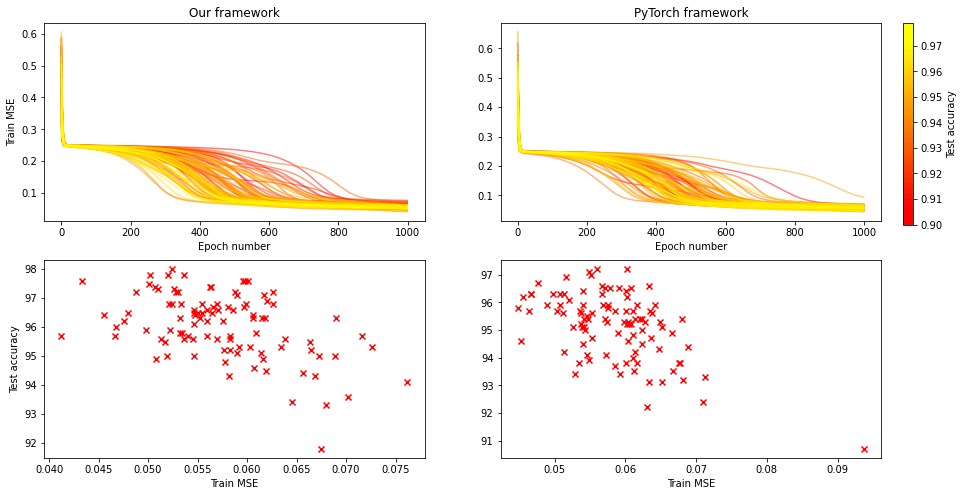

In [171]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
gs1 = GridSpec(2, 2, left=2)

c = 0
for i in accs_sort:
    axs[0,0].plot(train_loss_tracks[i], color = colors(c), alpha=1/2)
    c += 1

c = 0
for i in accs_sort:
    axs[0,1].plot(bm_train_loss_tracks[i], color = colors(c), alpha=1/2)
    c += 1

norm = mpl.colors.Normalize(vmin=np.min(bm_test_acc_tracks),vmax=np.max(bm_test_acc_tracks))
sm = plt.cm.ScalarMappable(cmap=colors, norm=norm)
sm.set_array([])

#fig.subplots_adjust(right=0.8)
cbaxes = fig.add_axes([.92, 0.53, 0.01, 0.35])
fig.colorbar(sm, ticks=np.arange(.9,.98,.01), boundaries=np.arange(.9,.98,.001),
             label='Test accuracy', ax = axs[0,1], cax=cbaxes);

axs[1,0].scatter(train_final_loss, 100*test_acc_tracks, marker='x', color='r')
axs[1,1].scatter(bm_train_final_loss, 100*bm_test_acc_tracks, marker='x', color='r')

axs[0,0].set_title('Our framework')
axs[0,1].set_title('PyTorch framework')


axs[0,0].set(ylabel='Train MSE', xlabel='Epoch number')
axs[1,0].set(ylabel='Test accuracy', xlabel='Train MSE')
axs[0,1].set(xlabel='Epoch number')
axs[1,1].set(xlabel='Train MSE')

In [173]:
fig.savefig('figures/perf_comparison', dpi=300)